## Title
Examining the Effects of Alcohol and Sulfur Dioxide Contents on the Quality of Red Wine

## Introduction
Red wine is not just any beverage. With physiological benefits, red wine can prevent heart disease and contains antioxidants. Although the drunk experience derives from alcohol content, red wine contains sulfur dioxide that may affect the respiratory system but stall oxidation and microbial spoilage and alcohol density that calculates how much alcohol is in a given volume. Inspired by the aforementioned research, we extracted a Wine Quality Data Set for a Portuguese red wine variant, Vinho Verde, the sample for the general red wine. Hence, we aim to answer this question in our classification project: Do alcohol, sulfur dioxide, and density affect the quality of red wine? 

## Preliminary exploratory data analysis

In [98]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
#source('tests.R')
#source('cleanup.R')

In [99]:
# this is the untidy data set 

url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
redwine <- read_delim(url, delim = ";")
redwine
#change the numeric quality into 'good' (if the numeric quality is greater than 5) and 
#'bad' (if the numeric quality is less or equal to 5)
good_redwine <- redwine %>%
    filter(quality > 5) %>%
    mutate(quality = "good")
bad_redwine <- redwine %>%
    filter(quality <= 5) %>%
    mutate(quality = "bad") 
redwine_new <- rbind(good_redwine, bad_redwine)
redwine_new

Parsed with column specification:
cols(
  `fixed acidity` = col_double(),
  `volatile acidity` = col_double(),
  `citric acid` = col_double(),
  `residual sugar` = col_double(),
  chlorides = col_double(),
  `free sulfur dioxide` = col_double(),
  `total sulfur dioxide` = col_double(),
  density = col_double(),
  pH = col_double(),
  sulphates = col_double(),
  alcohol = col_double(),
  quality = col_double()
)



fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
6.3,0.510,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11.0,6
5.9,0.645,0.12,2.0,0.075,32,44,0.99547,3.57,0.71,10.2,5
6.0,0.310,0.47,3.6,0.067,18,42,0.99549,3.39,0.66,11.0,6


fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,good
7.3,0.65,0.00,1.2,0.065,15,21,0.9946,3.39,0.47,10.0,good
7.8,0.58,0.02,2.0,0.073,9,18,0.9968,3.36,0.57,9.5,good
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
6.6,0.725,0.20,7.8,0.073,29,79,0.99770,3.29,0.54,9.2,bad
6.2,0.600,0.08,2.0,0.090,32,44,0.99490,3.45,0.58,10.5,bad
5.9,0.645,0.12,2.0,0.075,32,44,0.99547,3.57,0.71,10.2,bad


In [100]:
#we see that the 'quality' variable is of type character. 
#We change this to type factor

redwine_newfct <- redwine_new %>%
    mutate(quality = as_factor(quality))

#To ensure that there are only two levels ('good' and 'bad') in the 'quality' column,  we use the 'levels' function. 
#The reason for this is because there are many rows that are not shown in the table, which suggests 
#uncertainty as to what exactly the 'quality' column contains.
 
redwine_newfct %>%
    pull(quality) %>%
    levels()

[1] "good" "bad"

In [101]:
#We renamed the columns of the redwine_newfct dataset so that the column names use underscores

redwine_newfct <- redwine_newfct %>%
rename(fixed_acidity = "fixed acidity",
      volatile_acidity = "volatile acidity",
      citric_acid = "citric acid",
      residual_sugar = "residual sugar",
      free_sulfur_dioxide = "free sulfur dioxide",
      total_sulfur_dioxide = "total sulfur dioxide")
redwine_newfct

set.seed(2402)

#This is our unscaled training data set
redwine_split <- initial_split(redwine_newfct, prop = 0.6, strata = quality)
redwine_train <- training(redwine_split)
redwine_test <- testing (redwine_split)

#This is the summary data set of the tidy redwine data set. 
#Each value represent the mean value of all the values in that column. 

redwine_summary <- redwine_train %>%
map_df(mean)

redwine_summary 

fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,good
7.3,0.65,0.00,1.2,0.065,15,21,0.9946,3.39,0.47,10.0,good
7.8,0.58,0.02,2.0,0.073,9,18,0.9968,3.36,0.57,9.5,good
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
6.6,0.725,0.20,7.8,0.073,29,79,0.99770,3.29,0.54,9.2,bad
6.2,0.600,0.08,2.0,0.090,32,44,0.99490,3.45,0.58,10.5,bad
5.9,0.645,0.12,2.0,0.075,32,44,0.99547,3.57,0.71,10.2,bad


Warning message in mean.default(.x[[i]], ...):
“argument is not numeric or logical: returning NA”


fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8.231667,0.5295937,0.2595208,2.534531,0.0878375,15.98021,46.52031,0.9967174,3.318,0.6607812,10.41884,NA


In [102]:
redwine_num_obs <- nrow(redwine_train) 
redwine_train %>%
    group_by(quality) %>%
    summarize(count = n(),
             percentage = n() / redwine_num_obs * 100)

`summarise()` ungrouping output (override with `.groups` argument)



quality,count,percentage
<fct>,<int>,<dbl>
good,513,53.4375
bad,447,46.5625


From this, we see that the proportion of good and bad quality are roughly the same. Therefore, oversampling is unnecessary. 

Using the training data set values, we establish the following graphs by keeping 'alcohol' on the y-axis and changing the x-axis. We hypothesized that alcohol is a good predictor variable from the' mod' table. Hence, we varied the x-axis to observe whether variables exhibit a good pattern when 'alcohol' is plotted against them. 

Additionally, we used two other variables on the y-axis to observe any existing strong relationship between any two x-variables.

In [103]:
fixed_acidity_alcohol <- redwine_train %>%
    ggplot(aes(x = fixed_acidity, y = alcohol, color = quality)) +
    geom_point(alpha = 0.8, size = 3) +
    labs(x = "Fixed Acidity", 
         y = "Alcohol",
         color = "Quality") +
    scale_color_manual(values = c("green", "red")) +
    theme(text = element_text(size = 15)) +
ggtitle("Alcohol vs Fixed Acidity")

volatile_acidity_alcohol <- redwine_train %>%
    ggplot(aes(x = volatile_acidity, y = alcohol, color = quality)) +
    geom_point(alpha = 0.8, size = 3) +
    labs(x = "volatile acidity", 
         y = "alcohol",
         color = "Quality") +
    scale_color_manual(values = c("green", "red")) +
    theme(text = element_text(size = 15)) +
ggtitle("Alcohol vs Volatile Acidity")

citric_acid_alcohol <- redwine_train %>%
    ggplot(aes(x = citric_acid, y = alcohol, color = quality)) +
    geom_point(alpha = 0.8, size = 3) +
    labs(x = "Citric Acid", 
         y = "Alcohol",
         color = "Quality") +
    scale_color_manual(values = c("green", "red")) +
    theme(text = element_text(size = 15)) +
ggtitle("Alcohol vs Citric Acid")

residual_sugar_alcohol <- redwine_train %>%
    ggplot(aes(x = residual_sugar, y = alcohol, color = quality)) +
    geom_point(alpha = 0.8, size = 3) +
    labs(x = "Residual Sugar", 
         y = "Alcohol",
         color = "Quality") +
    scale_color_manual(values = c("green", "red")) +
    theme(text = element_text(size = 15)) +
ggtitle("Alcohol vs Residual Sugar")

chlorides_alcohol <- redwine_train %>%
    ggplot(aes(x = chlorides, y = alcohol, color = quality)) +
    geom_point(alpha = 0.8, size = 3) +
    labs(x = "Chlorides", 
         y = "Alcohol",
         color = "Quality") +
    scale_color_manual(values = c("green", "red")) +
    theme(text = element_text(size = 15)) +
ggtitle("Alcohol vs Chlorides")

free_sulfur_dioxide_alcohol <- redwine_train %>%
    ggplot(aes(x = free_sulfur_dioxide, y = alcohol, color = quality)) +
    geom_point(alpha = 0.8, size = 3) +
    labs(x = "Free Sulfur Dioxide", 
         y = "Alcohol",
         color = "Quality") +
    scale_color_manual(values = c("green", "red")) +
    theme(text = element_text(size = 15)) +
ggtitle("Alcohol vs Free Sulfur Dioxide")

total_sulfur_dioxide_alcohol <- redwine_train %>%
    ggplot(aes(x = total_sulfur_dioxide, y = alcohol, color = quality)) +
    geom_point(alpha = 0.8, size = 3) +
    labs(x = "Total Sulfur Dioxide", 
         y = "Alcohol",
         color = "Quality") +
    scale_color_manual(values = c("green", "red")) +
    theme(text = element_text(size = 15)) +
ggtitle("Alcohol vs Total Sulfur Dioxide")

density_alcohol <- redwine_train %>%
    ggplot(aes(x = density, y = alcohol, color = quality)) +
    geom_point(alpha = 0.8, size = 3) +
    labs(x = "Density", 
         y = "Alcohol",
         color = "Quality") +
    scale_color_manual(values = c("green", "red")) +
    theme(text = element_text(size = 15))+
ggtitle("Alcohol vs Density")

pH_alcohol <- redwine_train %>%
    ggplot(aes(x = pH, y = alcohol, color = quality)) +
    geom_point(alpha = 0.8, size = 3) +
    labs(x = "pH", 
         y = "Alcohol",
         color = "Quality") +
    scale_color_manual(values = c("green", "red")) +
    theme(text = element_text(size = 15)) +
ggtitle("Alcohol vs pH")

sulphates_alcohol <- redwine_train %>%
    ggplot(aes(x = sulphates, y = alcohol, color = quality)) +
    geom_point(alpha = 0.8, size = 3) +
    labs(x = "Sulphates", 
         y = "Alcohol",
         color = "Quality") +
    scale_color_manual(values = c("green", "red")) +
    theme(text = element_text(size = 15)) +
ggtitle("Alcohol vs Sulphates")

volatile_acidity_density <- redwine_train %>%
    ggplot(aes(x = volatile_acidity, y = density, color = quality)) +
    geom_point(alpha = 0.8, size = 3) +
    labs(x = "Density", 
         y = "Volatile Acidity",
         color = "Quality") +
    scale_color_manual(values = c("green", "red")) +
    theme(text = element_text(size = 15)) +
ggtitle("Volatile Acidity vs Density")

residual_sugar_citric_acid <- redwine_train %>%
    ggplot(aes(x = residual_sugar, y = citric_acid, color = quality)) +
    geom_point(alpha = 0.8, size = 3) +
    labs(x = "Residual Sugar", 
         y = "Citric Acid",
         color = "Quality") +
    scale_color_manual(values = c("green", "red")) +
    theme(text = element_text(size = 15)) +
ggtitle("Residual Sugar vs Citric Acid")



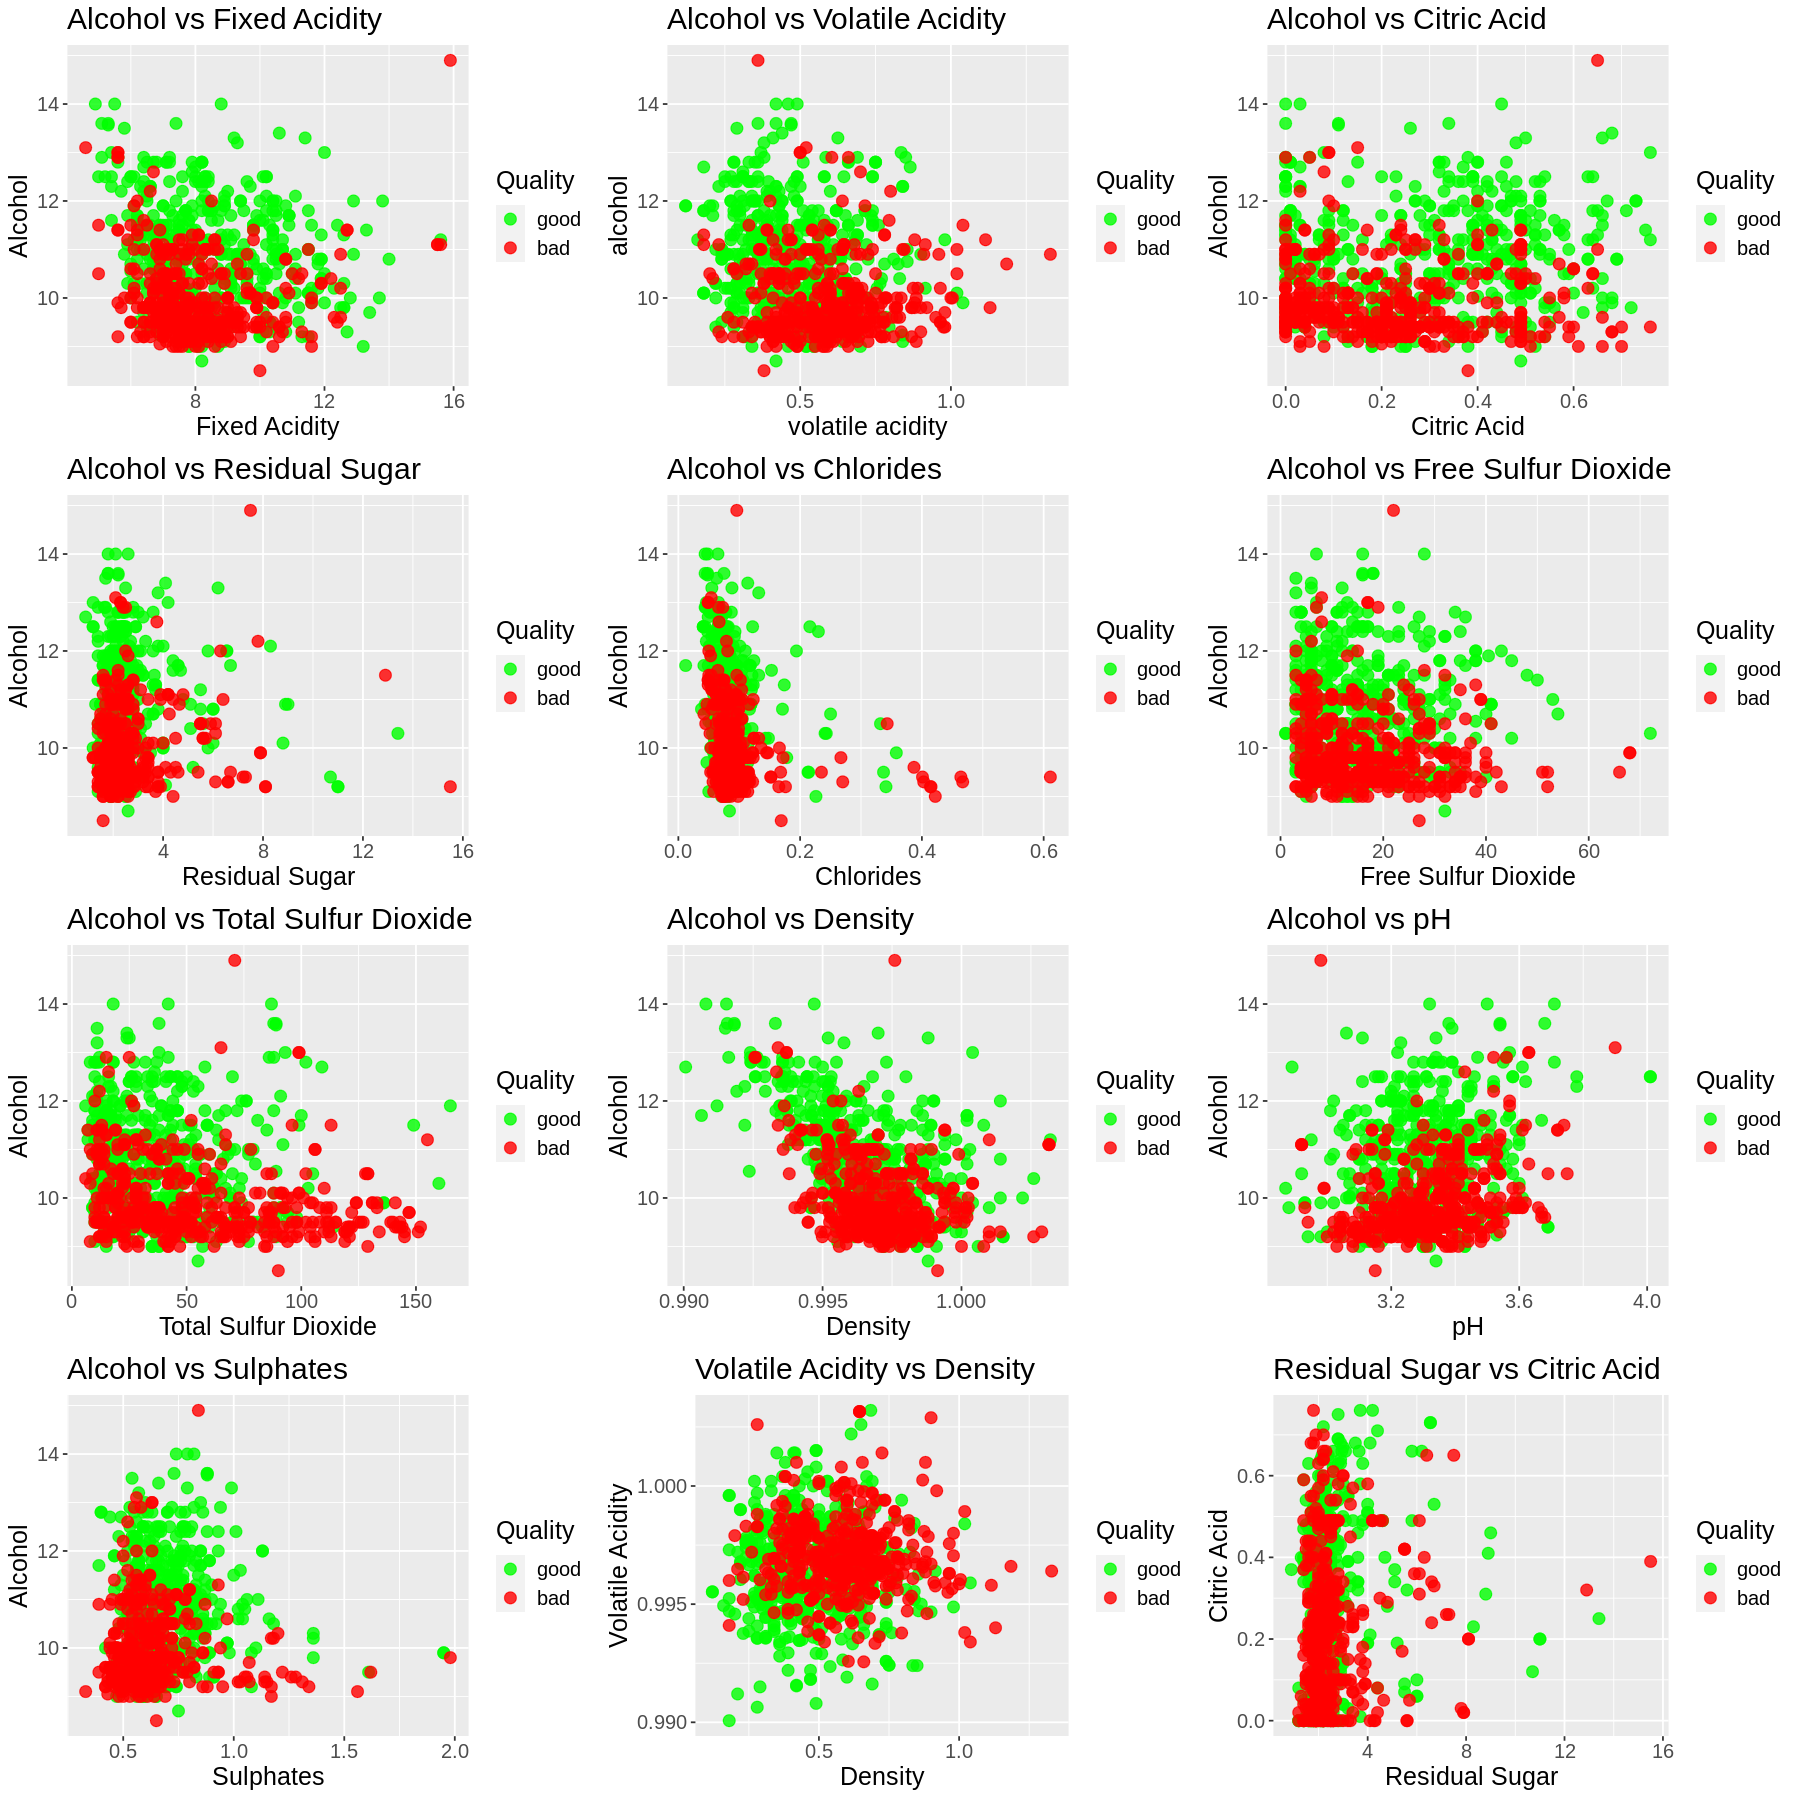

In [104]:
library(cowplot)
options(repr.plot.width = 15, repr.plot.height = 15)
mergePlots <- plot_grid(fixed_acidity_alcohol, volatile_acidity_alcohol, citric_acid_alcohol, residual_sugar_alcohol, chlorides_alcohol, 
                        free_sulfur_dioxide_alcohol, total_sulfur_dioxide_alcohol, density_alcohol, pH_alcohol, sulphates_alcohol, 
                        volatile_acidity_density, residual_sugar_citric_acid, ncol = 3) +
        theme(text = element_text(size = 10))
mergePlots


From the graphs above, we argue that a good trend is observed when 'total sulfur dioxide' and 'density' are each plotted against 'alcohol'. Notably, these three variables exhibit a strong to a moderate pattern, where a significant portion of the good-quality wines are clustered in the upper left corner, and the bad-quality wines are concentrated in the lower-left corner. Therefore, we decided to use 'alcohol,' 'total sulfur dioxide,' and 'density' as predicting variables.

A weak trend is observed for all other variables since most red and green plots overlap.

## Methods
When performing our predictive analysis, we first scale our training dataset to better visually predict the quality of an unknown wine. We do this by using the recipe function, where quality is the categorial label variable and 'alcohol,' 'total sulfur dioxide,' and 'density' are predictors. 

We will conduct a 5-fold cross-validation and tune the model to improve our models' accuracy to collect the workflow's metrics. We then plot the k-values against accuracy to obtain the k-value with the highest accuracy. Using this k-value and specifying 'weight_func = rectangular,' we recreate our knn-spec function. Subsequently, the model's accuracy will be tested using our testing data set, and if the accuracy is above 80, the model will be used to predict the quality of the unknown observation. Otherwise, we will use fewer predictors then repeat the process until the accuracy exceeds 80.

Finally, we plan on using a scatter plot because there is a correlation between the x and y continuous variables. The plots representing good-quality wine will be shown in green, whereas the bad-quality wines will be shown in red. In this way, we aim to make our graph as colour-friendly and interpretable as possible.  

In [105]:
redwine_train

fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,good
7.3,0.65,0.00,1.2,0.065,15,21,0.9946,3.39,0.47,10.0,good
7.8,0.58,0.02,2.0,0.073,9,18,0.9968,3.36,0.57,9.5,good
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
6.1,0.715,0.10,2.6,0.053,13,27,0.99362,3.57,0.50,11.9,bad
6.2,0.460,0.29,2.1,0.074,32,98,0.99578,3.33,0.62,9.8,bad
6.2,0.600,0.08,2.0,0.090,32,44,0.99490,3.45,0.58,10.5,bad


In [ ]:
#Note: the step for creating the 60/40 split of the training data into a training and validation set has already been performed near the beginning of this project analysis
#Goal: Use multiple different train/validation splits to attain a good estimate of accuracy and determine an optimal K parameter to use
options(repr.plot.width = 8, repr.plot.height = 5)

#Cross validation
redwine_vfold <- vfold_cv(redwine_train, v = 5, strata = quality)

#Preprocess the data using only the training set
redwine_recipe <- recipe(quality ~ alcohol + total_sulfur_dioxide + density,
                         data = redwine_train) %>%
    step_scale(all_predictors()) %>%   
    step_center(all_predictors())

#tune the model's K parameter
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
    set_engine("kknn") %>%
    set_mode("classification")

#get a K value using tune and gridvals
k_vals <- tibble(neighbors = seq(from = 1, to = 100, by = 5))

#create a workflow
knn_results<- workflow() %>%
    add_recipe(redwine_recipe) %>%
    add_model(knn_spec) %>%
    tune_grid(resamples = redwine_vfold, grid = k_vals) %>%

collect_metrics()

#determine the accuracy of the estimates
accuracies <- knn_results %>%
    filter(.metric == "accuracy")
accuracies

#create a plot of estimated accuracy vs the # of neighbors
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") + 
  theme(text = element_text(size = 12))
accuracy_vs_k

by printing the table for "accuracies," the highest mean value observed is for row 18 
or, equivalently, when the K parameter is equal to 96. Note that it has a standard error
of 0.0218 and a pure mean of 0.717. But due to standard error, this means that the mean 
could be either 0.739 or 0.695, representing the notion of distance between our 
predicted and true categorical variable values.

In [ ]:
print(accuracies, n = 100)

The model's highest accuracy obtained is 71.7% when predicting the quality of the unknown observation of red wine, classifying it as either good or bad quality based on the three predictor variables: alcohol, total sulfur dioxide, and density. 

NOTE TO SELF: Measurements will later be undertaken to see if this percentage accuracy can be raised to around 80%, but for now the data analysis will continue.

In [ ]:
#Goal: Train our classifier based on the training set using the obtained optimal K 
#value of 86 to see if it can appropriately predict observations from a test set. 

#Preprocess the data using only the training set (same step as before, but iterated for readability)
redwine_recipe <- recipe(quality ~ alcohol + total_sulfur_dioxide + density,
                         data = redwine_train) %>%
    step_scale(all_predictors()) %>%   
    step_center(all_predictors())

#Train the classifier
knn2_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 96) %>%
    set_engine("kknn") %>%
    set_mode("classification")

#Create the workflow
knn2_fit <- workflow() %>%
    add_recipe(redwine_recipe) %>%
    add_model(knn2_spec) %>%
    fit(data = redwine_train)
knn2_fit

#Predict the labels in the test set
redwine_test_predictions <- predict(knn2_fit, redwine_test) %>%
    bind_cols(redwine_test)
redwine_test_predictions

#Compute the accuracy
redwine_test_predictions %>%
    metrics(truth = quality, estimate = .pred_class) %>%
    filter(.metric == "accuracy") 

In [ ]:
confusion <- redwine_test_predictions %>%
    conf_mat(truth = quality, estimate = .pred_class)
confusion

The confusion matrix above shows 247 observations that were correctly predicted as 'good,' and 202 observations that were correctly predicted as 'bad' quality of red wine. Consequently, the classifier has labelled 247 + 202 = 449 observations correctly. However, despite this fact, the classifier was not perfect and made mistakes; to elaborate, the classifier incorrectly labelled 95 observations as bad when they were good, and incorrectly labelled 95 observations as good when they were bad. To determine the percent of inaccurate observations as bad when they were in reality good, divide the total number of inaccurate observations as bad when they were good by the total number of observations, like such: 95/639 = answer x 100 = 14.9%. To determine the percent of inaccurate observations as good when they were bad, divide the total number of inaccurate observations as good when they were bad by the total number of observations, like such: 95/639 = answer x 100 = 14.9%. When adding the prior two percentages, as follows: 14.9 + 14.9 = 29.8%, we see that the total percentage inaccuracy (rounded to the first decimal place) is 29.8%. This confusion matrix demonstrates the same information as the .estimate, which is that the classifier has an accuracy of 70.3% or an inaccuracy of 29.8% when predicting on newly observed data regarding the quality of red wine. Further, this specific matrix reveals in a succint way exactly how many observations were correctly predicted and for which categories, and vice versa. 

## Expected Outcomes and Significance
We expect to find that the quality of red wine increases as alcohol content increases but decreases as density and sulfur dioxide increase. If the previous statement is true, this may be applicable for red wine consumers searching for purer and better alcohol with lower intoxicating effects and harmful chemical content. This potential outcome raises a health concern for red wine consumers, leading to the question for winemakers: Is there a way to remove the need to use sulfur dioxide in wine and lower the density? 